# Seaborn 
更多在这里 plotting_basics.ipynb

1. 使用 Seaborn 库创建图形    
- sns.barplot(data=top5_category, x = 'FoodCategory', y = 'Calories')        
               
sns :使用 Seaborn 绘制了一个柱状图 (bar plot)，其中：数据来源是 top5_category：一个包含数据的 DataFrame。x，y 是其中的两个列。

## seaborn 的查找

- 它有个库有很多数据集，里面很多数据文档，可以直接 sns.load_dataset("titanic") 调用。
- 网址： https://github.com/mwaskom/seaborn-data/blob/master/titanic.csv

- searh "seaborn load dataset" in google ,then find the seaborn github - mwaskom - seaborn-data 数据源
- have lots of datasets for visualizatin test it out or mchine learning.
- eg. titanic 泰坦尼克

### seaborn github 上的 csv 数据提取的两种方式：

1. pd.read_csv()   df = pd.read_csv(url) -- pandas 访问网址          
import pandas as pd    
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv"      
df = pd.read_csv(url)        
df.head()         

2. sns.load_dataset("titanic")  --   sns 直接 + 数据名              
titanic = sns.load_dataset("titanic")    # Dataframe         
titanic.head()         

### Seaborn 示例：快速绘图   

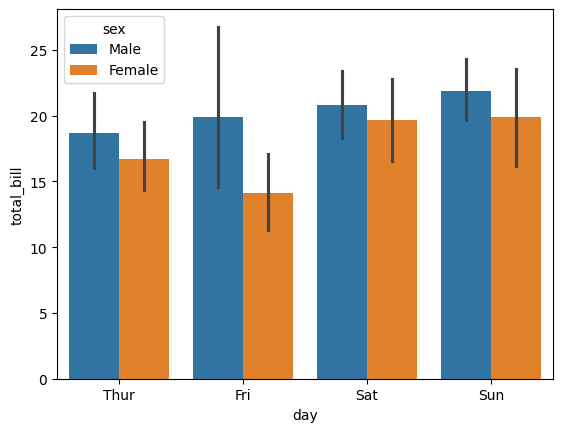

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Seaborn 示例：快速绘图   

# 示例数据
tips = sns.load_dataset("tips")    # tips 是 seaborn 网站自带的数据 可以直接引用

# 使用 Seaborn 绘制分类柱状图
sns.barplot(data=tips, x="day", y="total_bill", hue="sex")

# 显示图表
plt.show()

# 输出：
# 自动计算每个 day 的均值并绘制柱状图。
#  hue="sex"，图表默认美观，颜色区分 sex 分类数据，无需额外设置。

### Matplotlib 示例：等效代码

/var/folders/gn/2sqcwh556yv91y24xm14ldsc0000gn/T/ipykernel_85595/3127637621.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = tips.groupby(["day", "sex"])["total_bill"].mean().unstack()


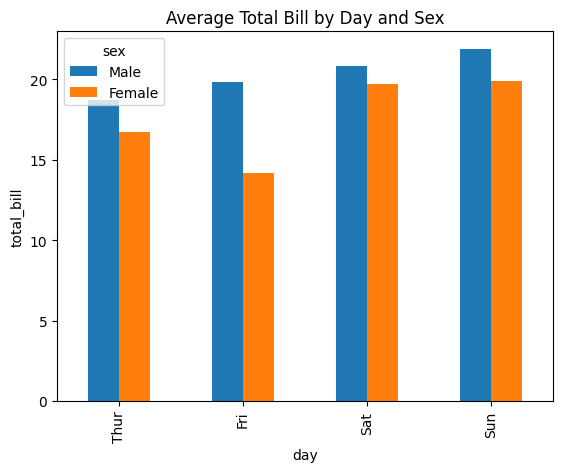

In [2]:
# Matplotlib 示例：等效代码

import matplotlib.pyplot as plt
import pandas as pd

# 示例数据
tips = sns.load_dataset("tips")

# 手动聚合数据
# 是 Pandas 中的分组聚合操作，它的作用是对 tips 数据集按 "day" 和 "sex" 这两列分组，计算每组对应的 "total_bill" 列的平均值，
# unstack() 并将结果进行格式化，转换为一个 透视表（DataFrame）重新排列成二维表。

# unstack() 会将分组中的 某一级索引 转换为列索引。
# 在本例中，"sex" 会被放到列索引，结果类似于一个透视表 (Pivot Table) 的效果。行索引是 "day"，列索引是 "sex"。

grouped = tips.groupby(["day", "sex"])["total_bill"].mean().unstack()

# 使用 Matplotlib 绘制柱状图
fig, ax = plt.subplots()
grouped.plot(kind="bar", ax=ax)
plt.xlabel("day")
plt.ylabel("total_bill")
plt.title("Average Total Bill by Day and Sex")
plt.show()

#输出：
# 需要手动聚合数据，再传递给绘图函数。
# 图表样式需要额外调整，如颜色、标题、轴标签等。

In [3]:
grouped

sex,Male,Female
day,,
Thur,18.714667,16.715312
Fri,19.857000,14.145556
Sat,20.802542,19.680357
Sun,21.887241,19.872222


### 使用 matplotlib 和 seaborn 库来创建一个包含三个子图的图形

#### 创建子图

- plt.subplots(1, 3)：这表示创建一个包含 1 行和 3 列子图的图形布局，也就是一个横向排列的三个子图。

- fig：这是整个图形对象，表示我们创建的这张图，它是 plt.subplots() 函数的第一个返回值。

- axes：这是一个包含子图对象的数组。在这个例子中，由于创建了 1 行 3 列的子图，axes 将是一个包含 3 个子图对象的数组。你可以通过 axes[0]、axes[1] 和 axes[2] 来访问每个子图。

- dpi=120：指定图形的分辨率，单位是每英寸点数（DPI）。120 dpi 表示图像每英寸包含 120 个点，相对较高的分辨率。

- figsize=(16, 4)：设置图形的大小，单位是英寸。这里的 (16, 4) 表示图形的宽度是 16 英寸，高度是 4 英寸。

In [ ]:
# 1. 创建子图- 3个
fig, axes = plt.subplots(1, 3, dpi=120, figsize=(16, 4))

# 2. 标题，数据 和 X 轴列
titles = ["Solid Top 5", "Liquids Top 5", "top 5 per group median"]  
data_frames = [solids_top5, liquids_top5, top5_category]
x_columns = ["FoodItem", "FoodItem", "FoodCategory"]

# 3. 循环绘制图形
for ax, data, title, x_column in zip(axes, data_frames, titles, x_columns):  # zip 同时迭代这些参数
    sns.barplot(data=data, x = x_column, y="Calories", ax=ax)    # y="Calories" 三个图每个列都是这个值
    ax.set(title=title)  # 设置每个子图的标题。 ax=ax 指定绘制到哪个子图（坐标轴）上

    # looks ugly, do some changes x轴 标题竖着显示了。
    # 是 matplotlib 中的一个方法， 用于设置 X 轴的标签文本。
    # get_xticklabels(), rotation=90 的作用是把当前的 X 轴标签重新设置为相同的标签，但额外增加了 rotation=90 参数。
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)

# 4. 保存图形， 到 figures 文件夹的 .png 文件格式。
# bbox_inches="tight" 选项会确保图形边界紧凑，去除不必要的空白区域。通常会自动调整图像的边界，使得图形和标签都能尽可能地在图像区域内显示。

fig.savefig("figures/Calories.png", bbox_inches = "tight")

In [ ]:
# 可以看第一个表的数据
data_frames[0]

### Seaborn 是什么？            
- Seaborn 是一个基于 Matplotlib 的高级数据可视化库，专门用于绘制统计图表。         
- 它可以让你用更少的代码、更美观的样式生成强大的数据可视化。  

对比点	        Seaborn	                               Matplotlib    
适用场景       	快速生成统计图表，探索性数据分析（EDA）。  	高度自定义绘图，或需要控制图形的每个细节。   
复杂数据处理   	自动处理分类数据和统计聚合。	           需要手动处理数据，提供更大的灵活性。     
学习曲线  	    更易上手，尤其是 Pandas 用户。	         初学者可能需要较长时间掌握其灵活性和复杂性。 

- Seaborn 更适合数据分析阶段，快速探索数据模式。
- Matplotlib 更适合复杂和高度自定义的场景。
- 两者结合使用往往可以发挥最大的优势！

- 示例对比       
Seaborn 示例：快速绘图      
Matplotlib 示例：等效代码     